Pasos para el Análisis de Regresión Logística:
1. Cargar el Dataset
Primero, carga el dataset en tu entorno de trabajo.

In [440]:
import pandas as pd

# Cargar el dataset desde un archivo CSV (asegúrate de que el archivo esté en tu directorio de trabajo)
df = pd.read_csv('heart.csv')

# Mostrar las primeras filas del dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


2. Explorar y Preprocesar los Datos
Es importante explorar los datos para entender su estructura y limpiar cualquier dato faltante o erróneo.

In [441]:
# Resumen del dataset para revisar tipos de datos y valores faltantes
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Reemplazar valores nulos si existen, por ejemplo:
df = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [442]:
# Mostrar los nombres de las columnas
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


3. Seleccionar las Variables y la Etiqueta
Selecciona las variables predictoras (features) y la variable objetivo (target).

In [443]:
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # Solo la última columna

4. Dividir los Datos en Conjuntos de Entrenamiento y Prueba
Divide los datos en conjuntos de entrenamiento y prueba para evaluar el modelo.

In [444]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Entrenar el Modelo de Regresión Logística
Usa la regresión logística para entrenar el modelo.

In [445]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

6. Evaluar el Modelo
Evalúa el modelo usando el conjunto de prueba.

In [446]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predecir los resultados
y_pred = model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.80
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Accuracy: 0.80
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



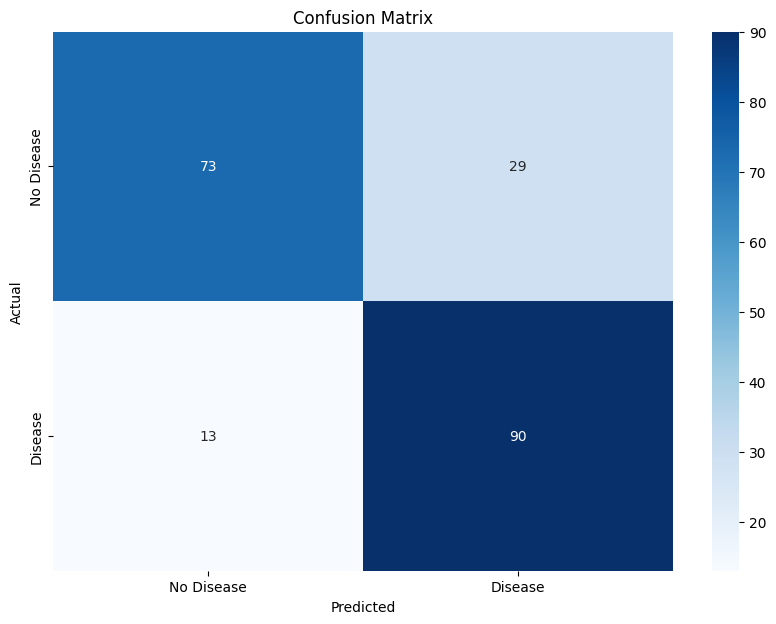

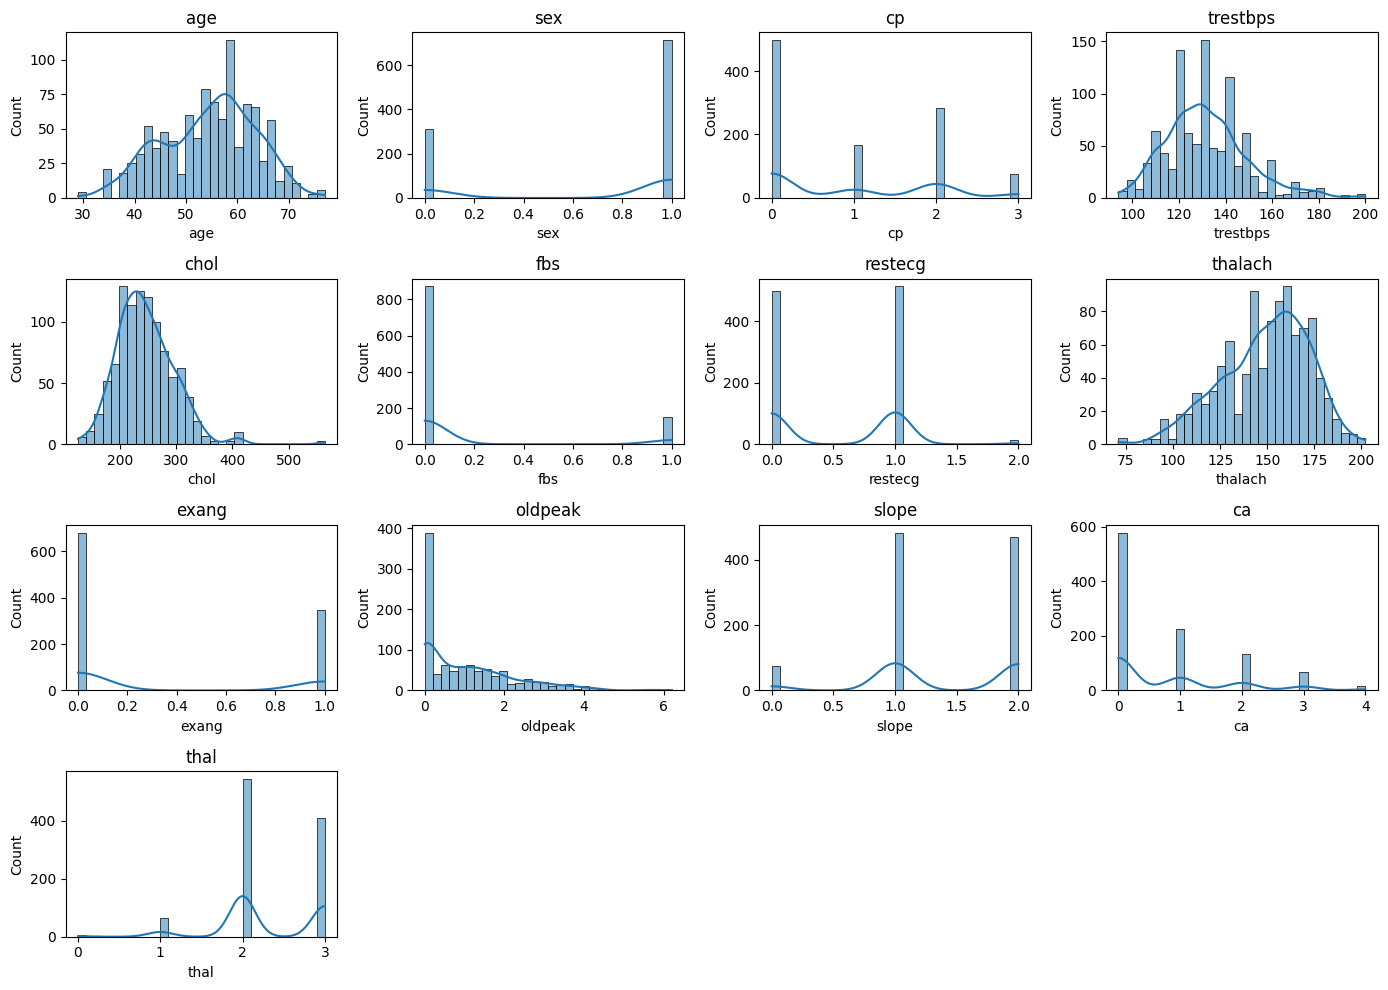

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset
df = pd.read_csv('heart.csv')

# Asumir que la última columna es la variable objetivo y el resto son características
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # Solo la última columna

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Graficar la distribución de las características
plt.figure(figsize=(14, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()


Precisión: 0.80
Matriz de Confusión:
[[73 29]
 [13 90]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



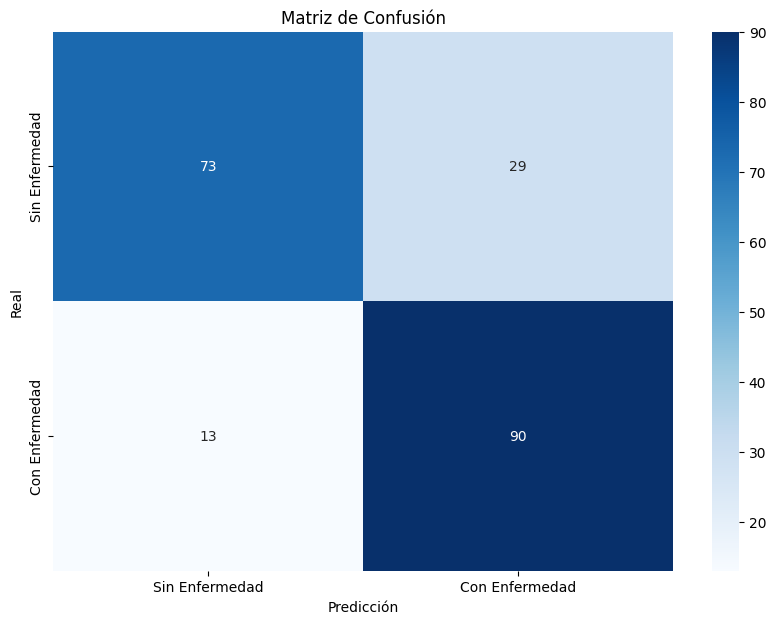

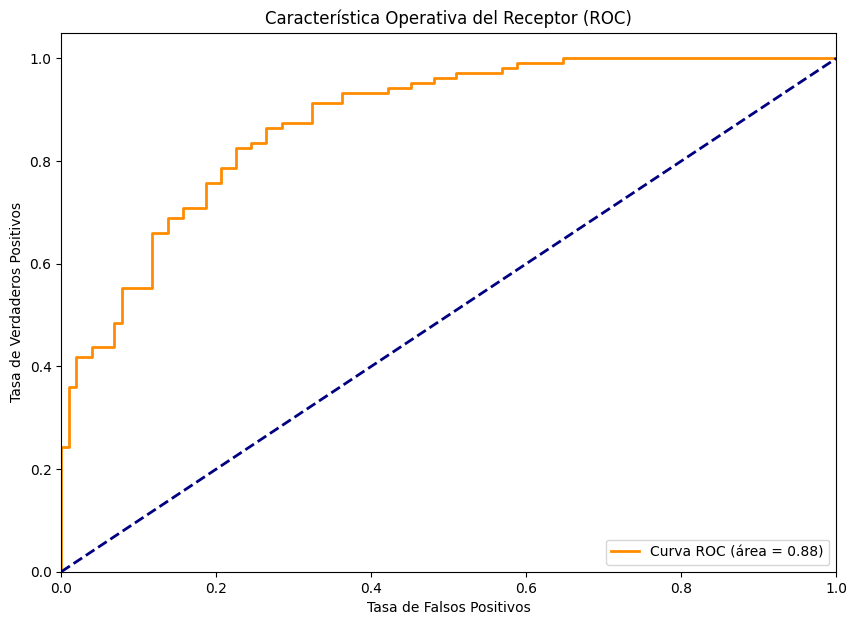

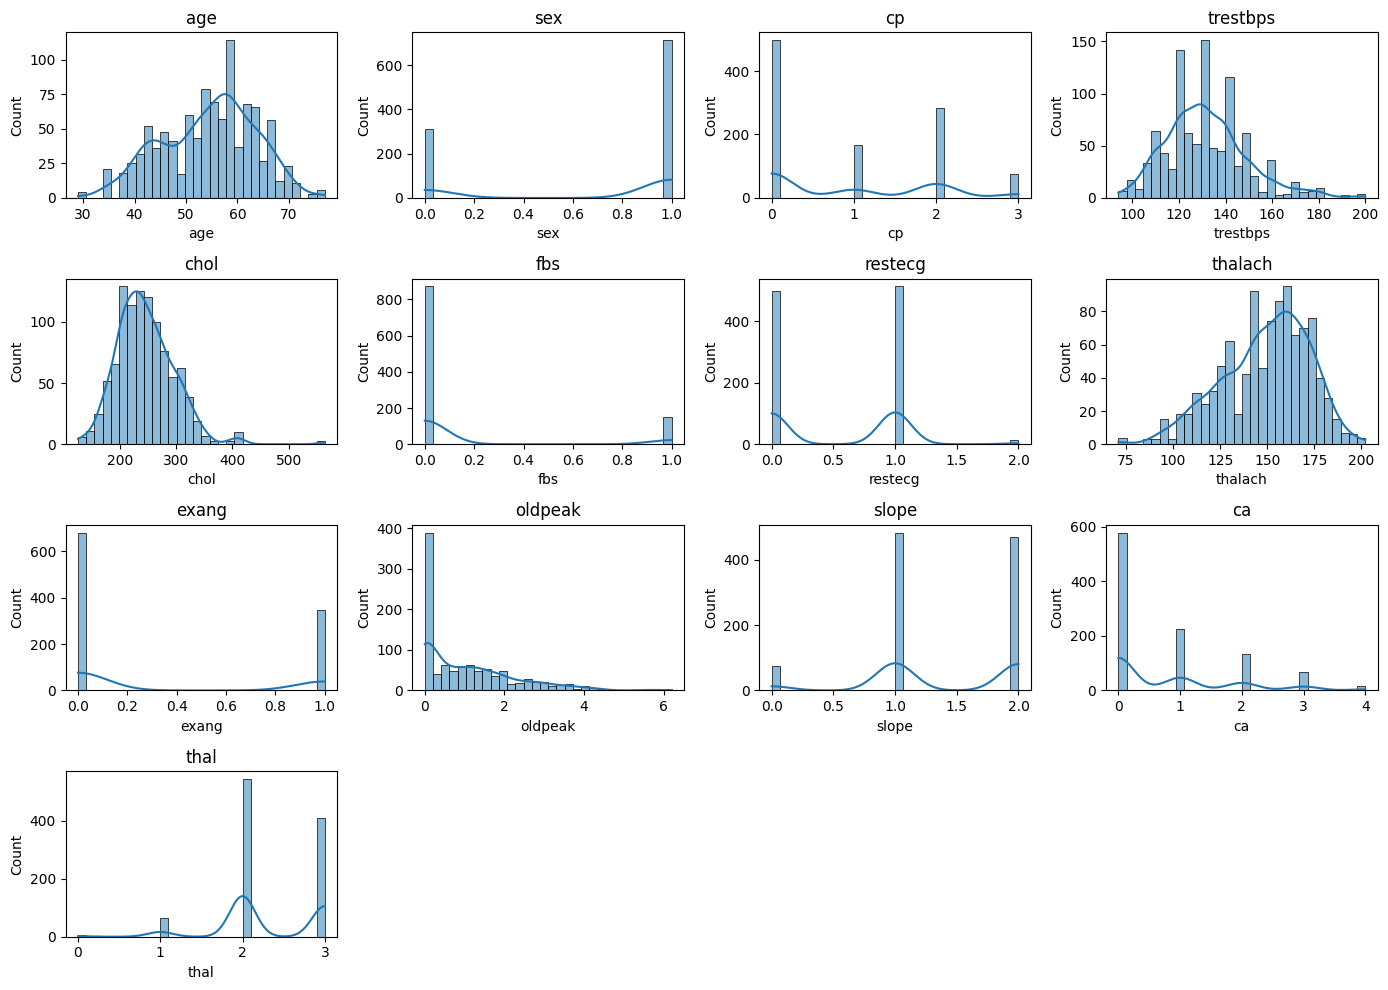

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Cargar el dataset

#Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f'Precisión: {accuracy:.2f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Reporte de Clasificación:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sin Enfermedad', 'Con Enfermedad'], yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

# Graficar la distribución de las características
plt.figure(figsize=(14, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

In [449]:
# # Importar las librerías necesarias
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, log_loss
# from sklearn.preprocessing import StandardScaler

# # Cargar el dataset
# df = pd.read_csv('heart.csv')

# # Verificar los nombres de las columnas
# print("Nombres de columnas:", df.columns)

# # Seleccionar las características (X) y la variable objetivo (y)
# # Asumimos que la última columna es la variable objetivo
# X = df.iloc[:, :-1].values  # Convertir a un array de numpy
# y = df.iloc[:, -1].values   # Convertir a un array de numpy

# # Dividir el dataset en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Opcional: Normalizar los datos
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Crear y entrenar el modelo de regresión logística
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Realizar predicciones
# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# # Evaluar el modelo
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# cost = log_loss(y_test, y_prob)

# # Imprimir los resultados de la evaluación
# print(f'Precisión: {accuracy:.2f}')
# print('Matriz de Confusión:')
# print(conf_matrix)
# print('Reporte de Clasificación:')
# print(class_report)
# print(f'Costo (Pérdida Logística): {cost:.2f}')

# # Graficar la matriz de confusión
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Sin Enfermedad', 'Con Enfermedad'], yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
# plt.xlabel('Predicción')
# plt.ylabel('Real')
# plt.title('Matriz de Confusión')
# plt.show()

# # Graficar la curva ROC
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 7))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Tasa de Falsos Positivos')
# plt.ylabel('Tasa de Verdaderos Positivos')
# plt.title('Característica Operativa del Receptor (ROC)')
# plt.legend(loc='lower right')
# plt.show()

# # Graficar la distribución de las características
# plt.figure(figsize=(14, 10))
# for i, column in enumerate(df.columns[:-1]):  # Excluir la columna objetivo
#     plt.subplot(4, 4, i + 1)
#     sns.histplot(df[column], kde=True, bins=30)
#     plt.title(column)
# plt.tight_layout()
# plt.show()

# # Función de Sigmoide
# def sigmoid(z):
#     # Calcula la sigmoide de una entrada z
#     z = np.array(z)
#     g = 1 / (1 + np.exp(-z))
#     return g

# # Prueba la implementación de la función sigmoide
# z = [0, 0.5, 1]
# g = sigmoid(z)
# print('g(', z, ') = ', g)

# # Añadir una columna de unos para el término de intercepción
# m, n = X.shape
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

# # Función para calcular el costo
# def calcularCosto(theta, X, y):
#     m = y.size  # número de ejemplos de entrenamiento
#     h = sigmoid(X.dot(theta.T))
#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
#     return J

# # Función para realizar el descenso por gradiente
# def descensoGradiente(theta, X, y, alpha, num_iters):
#     m = y.shape[0]  # número de ejemplos de entrenamiento
#     theta = theta.copy()
#     J_history = []

#     for i in range(num_iters):
#         h = sigmoid(X.dot(theta.T))
#         theta = theta - (alpha / m) * (h - y).dot(X)
#         J_history.append(calcularCosto(theta, X, y))
#     return theta, J_history

# # Parámetros para el descenso por gradiente
# alpha = 0.001
# num_iters = 100

# # Inicializar theta y ejecutar el descenso por gradiente
# theta = np.zeros(X.shape[1])
# theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# # Graficar la convergencia del costo
# plt.plot(np.arange(len(J_history)), J_history, lw=2)
# plt.xlabel('Número de Iteraciones')
# plt.ylabel('Costo J')
# plt.title('Convergencia del Costo')
# plt.show()

# # Resultados del descenso por gradiente
# print('Theta calculado por el descenso por el gradiente:', theta)

# # Verificar si un estudiante con ciertas notas aprueba
# X_array = [1, 80, 46]
# aprueba = sigmoid(np.dot(X_array, theta))
# print(f'Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente): {aprueba:.0f}')

# X_array = [1, 80, 50]
# y_predicted = sigmoid(np.dot(X_array, theta))
# print(f'Un estudiante con nota del examen 1: 80 y nota del examen 2: 50 (usando el descenso por el gradiente): {y_predicted:.0f}')

# # Función para calcular el costo y gradiente
# def costFunction(theta, X, y):
#     m = y.size  # número de ejemplos de entrenamiento
#     h = sigmoid(X.dot(theta.T))
#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
#     grad = (1 / m) * (h - y).dot(X)
#     return J, grad

# # Inicialización de parámetros de ajuste
# initial_theta = np.zeros(X.shape[1])
# cost, grad = costFunction(initial_theta, X, y)
# print(f'Costo en theta inicial (ceros): {cost:.3f}')
# print('Gradiente en theta inicial (ceros):', grad)

# # Cálculo del costo y gradiente con valores de theta diferentes a cero
# test_theta = np.array([-24, 0.2, 0.2])
# cost, grad = costFunction(test_theta, X, y)
# print(f'Costo en theta prueba: {cost:.3f}')
# print('Gradiente en theta prueba:', grad)


In [450]:
import numpy as np
from scipy import optimize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * X.T.dot(h - y)
    return J, grad

# Inicialización
initial_theta = np.zeros(X.shape[1])
options = {'maxiter': 1000}

# Optimización
res = optimize.minimize(costFunction, initial_theta, (X, y), method='TNC', jac=True, options=options)

# Resultados
cost = res.fun
theta = res.x

print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('theta:')
print('\t{}'.format(theta))


Costo con un valor de theta encontrado por optimize.minimize: 0.354
theta:
	[ 0.01072669 -1.71447724  0.84385769 -0.01373107 -0.00461756 -0.14868232
  0.50498315  0.03284894 -0.89429824 -0.52963453  0.5601726  -0.74940431
 -0.82221723]


C:\Users\david\AppData\Local\Temp\ipykernel_2840\985026140.py:24: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction, initial_theta, (X, y), method='TNC', jac=True, options=options)


In [451]:
from scipy import optimize

# Configurar las opciones para optimize.minimize
options = {'maxiter': 1000}

# Ejecutar la optimización
res = optimize.minimize(costFunction,
                       initial_theta,
                       (X, y),
                       jac=True,
                       method='TNC',
                       options=options)

# Obtener el costo y los parámetros optimizados
cost = res.fun
theta = res.x

# Imprimir los resultados
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Theta encontrado:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))


C:\Users\david\AppData\Local\Temp\ipykernel_2840\1657659942.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.354
Theta encontrado:
	[0.011, -1.714, 0.844]


In [452]:
def mapFeature(X1, X2):
    """
    Expande las características X1 y X2 en un conjunto de características polinómicas.
    Esto permite generar características como x1^2, x1*x2, x2^2, etc.

    Parametros
    ----------
    X1 : array_like
        Primer conjunto de características (p. ej., puntuaciones del examen 1).
    X2 : array_like
        Segundo conjunto de características (p. ej., puntuaciones del examen 2).

    Devuelve
    -------
    out : array_like
        Matriz de características extendida con características polinómicas.
    """
    degree = 6  # Grado de las características polinómicas
    out = np.ones((X1.shape[0], 1))

    for d in range(1, degree + 1):
        for i in range(d + 1):
            term = (X1 ** (d - i)) * (X2 ** i)
            out = np.hstack((out, term.reshape(-1, 1)))
    
    return out
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un límite de decisión definido por theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        Una función para graficar los datos X e y.

    theta : array_like
        Parámetros para la regresión logística. Un vector de la forma (n+1, ).

    X : array_like
        Datos de entrada. Se supone que X es una matriz MxN donde la primera columna son unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    theta = np.array(theta)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitido', 'No admitido', 'Límite de decisión'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((u.size, v.size))

        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)
        
        z = z.T
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


In [453]:
def plotData(X, y):
    plt.figure()
    pos = y == 1
    neg = y == 0
    plt.plot(X[pos, 1], X[pos, 2], 'k*', lw=2, ms=10, label='Positivos')
    plt.plot(X[neg, 1], X[neg, 2], 'ko', mfc='y', ms=8, mec='k', mew=1, label='Negativos')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()

def plotDecisionBoundary(plotData, theta, X, y):
    theta = np.array(theta)
    plotData(X, y)
    
    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        plt.plot(plot_x, plot_y, label='Frontera de Decisión')
        plt.xlim([np.min(X[:, 1]), np.max(X[:, 1])])
        plt.ylim([np.min(X[:, 2]), np.max(X[:, 2])])
        plt.legend()
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((u.size, v.size))
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)
        z = z.T
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

# # Graficar la frontera de decisión
# plotDecisionBoundary(plotData, theta[:, 6], X[:, 6], y)
# plt.show()


In [454]:
print("Tamaño de theta:", theta.shape)


Tamaño de theta: (13,)


In [455]:
def predict(theta, X):
    """
    Predice si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x) >= 0.5, predice 1).

    Parámetros:
    ----------
    theta : array_like
        Parámetros para regresión logística. Un vector de la forma (n+1, ).

    X : array_like
        Datos utilizados para el cálculo de las predicciones.
        La fila es el número de los puntos para calcular las predicciones,
        y las columnas con el número de características.

    Devuelve:
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0]  # Número de ejemplos de entrenamiento
    p = np.zeros(m)

    # Calcular la probabilidad usando la función sigmoide
    p = np.round(sigmoid(X.dot(theta.T)))
    return p
# Predice la probabilidad para un nuevo paciente con características específicas
# Ajusta el vector [1, 65, 1, 120, 240, 1, 0, 1, 150, 0, 1, 1, 2, 1] según el formato de tus datos
nuevo_paciente = [58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2]  # Ajusta según las características específicas de tu modelo
# 58	0	0	100	248	0	0	122	0	1	1	0	2	1

prob = sigmoid(np.dot(nuevo_paciente, theta))
print('Para un paciente con las características proporcionadas, se predice una probabilidad de enfermedad cardíaca de: {:.3f}'.format(prob))
# Calcula las predicciones para el conjunto de entrenamiento
p = predict(theta, X)

# Imprimir la precisión
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))


Para un paciente con las características proporcionadas, se predice una probabilidad de enfermedad cardíaca de: 0.622
Precisión de entrenamiento: 84.98 %
